# Liver Classification Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
%matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set()

plt.style.use("ggplot")

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
# Load the dataset.
dataset = pd.read_csv("india_liver.csv")

In [4]:
#  Check the first 5 rows.
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
#  we have the classification problem dataset.
#  we have the target column dataset.
# This is the supervised machine learning
# And this is also the Binary Classification Problem.

In [8]:
dataset.shape

(583, 11)

In [9]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [10]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [12]:
#  we have the 4 missing value into the dataset so we just fill it with the mean of the feature.
# dataset["Albumin_and_Globulin_Ratio"].fillna(dataset["Albumin_and_Globulin_Ratio"].mean(), inplace=True)

dataset.fillna({"Albumin_and_Globulin_Ratio": dataset["Albumin_and_Globulin_Ratio"].mean()}, inplace=True)

In [13]:
dataset.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## EDA Exploratory Data Analaysis.


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
dataset.dtypes[dataset.dtypes == "object"]
#  we have the only one categorical value in my dataset.

Gender    object
dtype: object

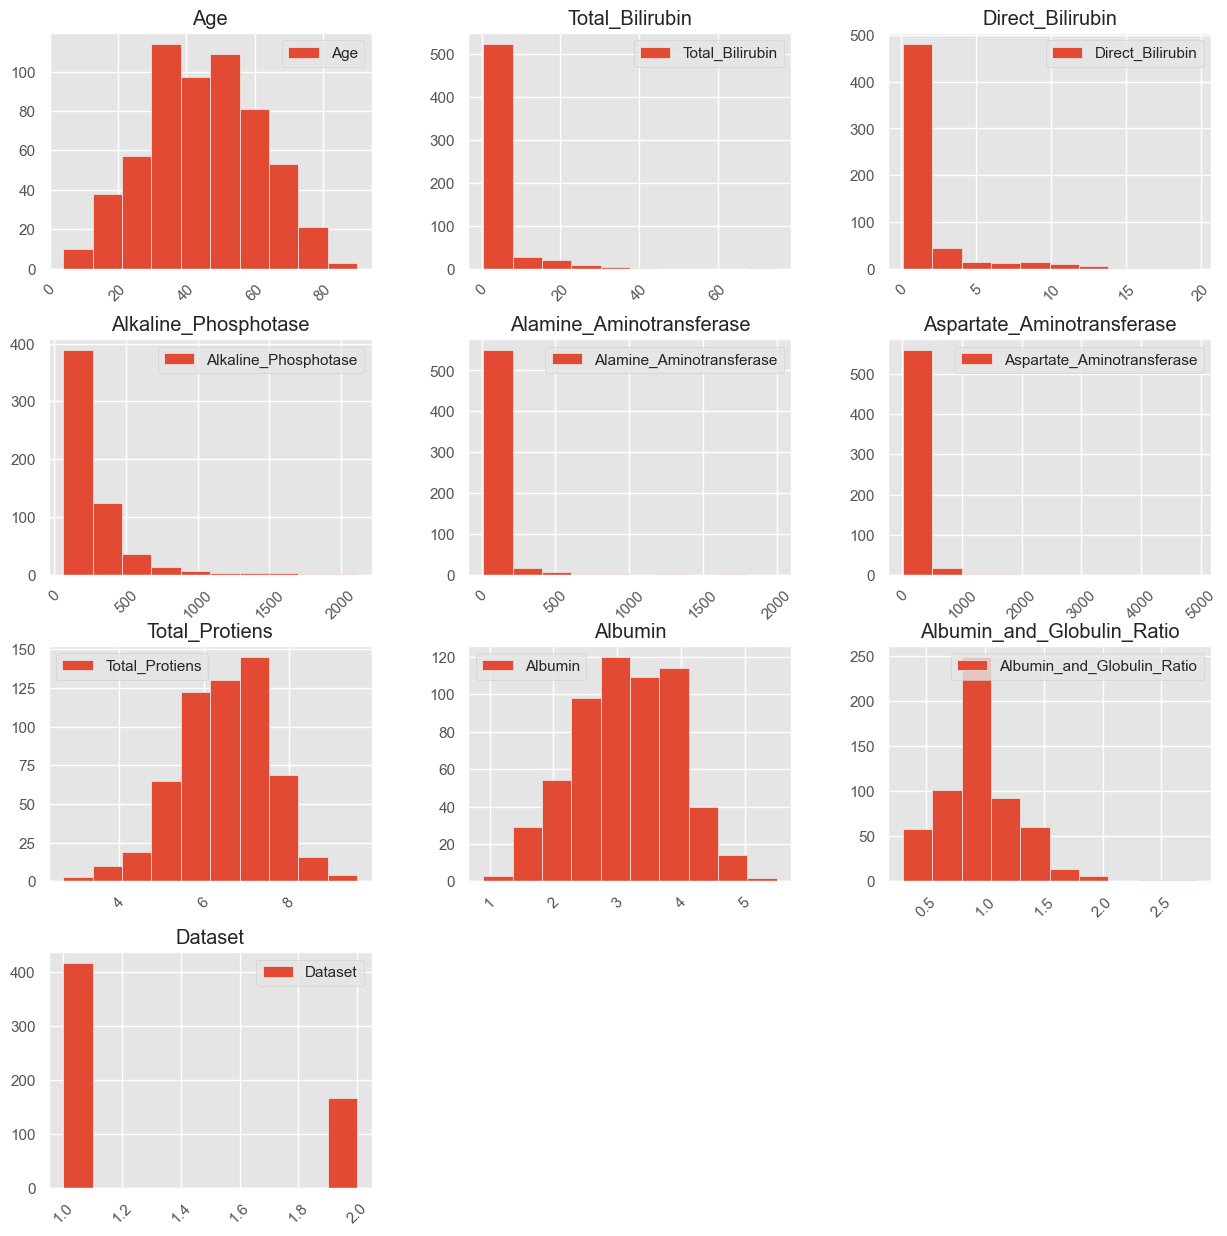

In [16]:
dataset.hist(figsize=(15,15),grid=True, legend=True,xrot=45)
plt.show()

In [17]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [18]:
#  Convert the target value in the form of the 0 and 1
dataset["Dataset"] = dataset["Dataset"].apply(lambda val:1 if val == 1 else 0)
dataset

# dataset.apply({"Dataset" : dataset.Dataset.apply(lambda val: 0 if val == 1 else 1)}, inplace = True)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [19]:
dataset.Dataset.value_counts()

Dataset
1    416
0    167
Name: count, dtype: int64

In [20]:
dataset.describe(include=["object"])

,Gender
count,583
unique,2
top,Male
freq,441


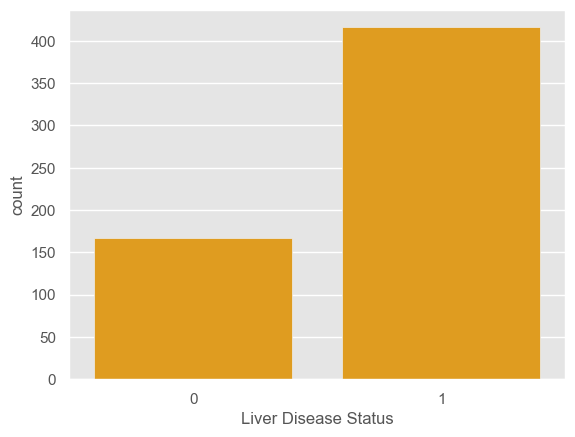

In [21]:
sns.countplot(x = dataset.Dataset, data = dataset, color="orange")
plt.xlabel("Liver Disease Status")
# plt.legend(dataset.Dataset)
plt.show()

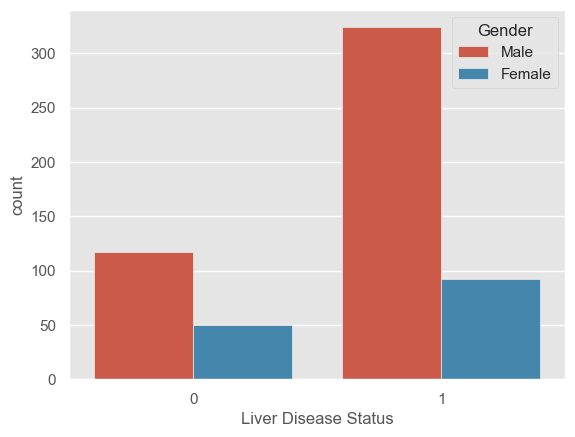

In [22]:
#  Find the liver disease by the Gender
sns.countplot(x = dataset.Dataset,hue=dataset.Gender, data = dataset)
plt.xlabel("Liver Disease Status")
# plt.legend(dataset.Dataset)
plt.show()

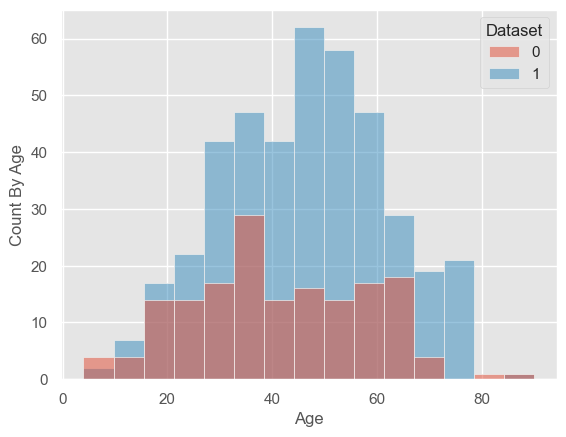

In [23]:
#  Find the liver disease by the Gender
sns.histplot(x = dataset.Age, hue=dataset.Dataset)
plt.xlabel("Age")
plt.ylabel("Count By Age")
plt.show()

In [24]:
#  Convert the Gender of categorical into the numerical Format.
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

In [26]:
dataset.Gender = encoder.fit_transform(dataset.Gender)

In [27]:
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [28]:
#  FInd the correlation based on the dataset.
dataset.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,-0.161388
Albumin_and_Globulin_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,-0.162319


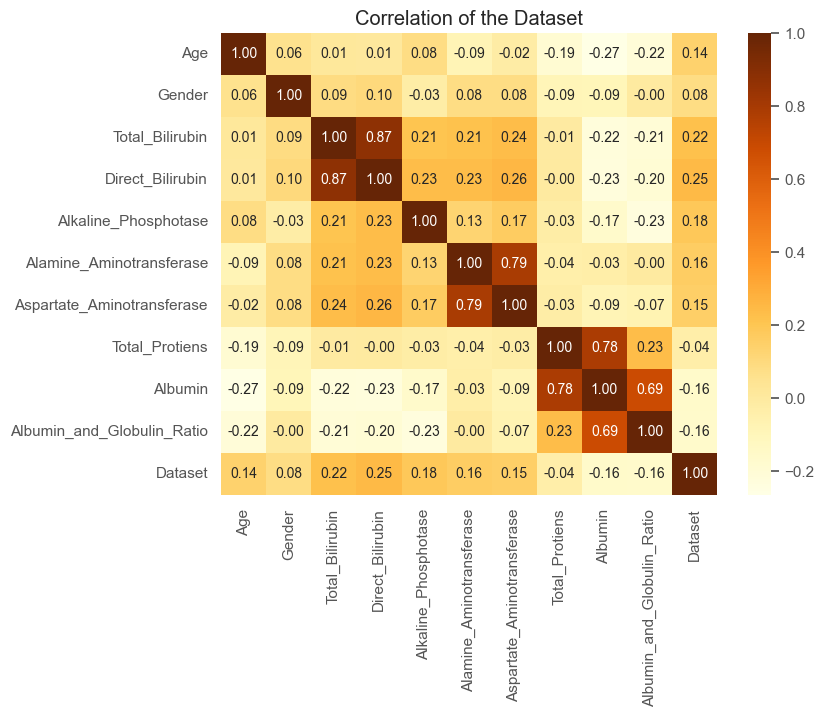

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(data = dataset.corr(), annot = True, cmap = "YlOrBr", fmt='.2f')
plt.title("Correlation of the Dataset")
plt.show()

#  Correlation means the dependency of the one feature to the other.
# Positive Correlation:- If one value is Increase Other One is also Increase
# Negative Correlation:- If One Value of Decrease Other One is also Decrease

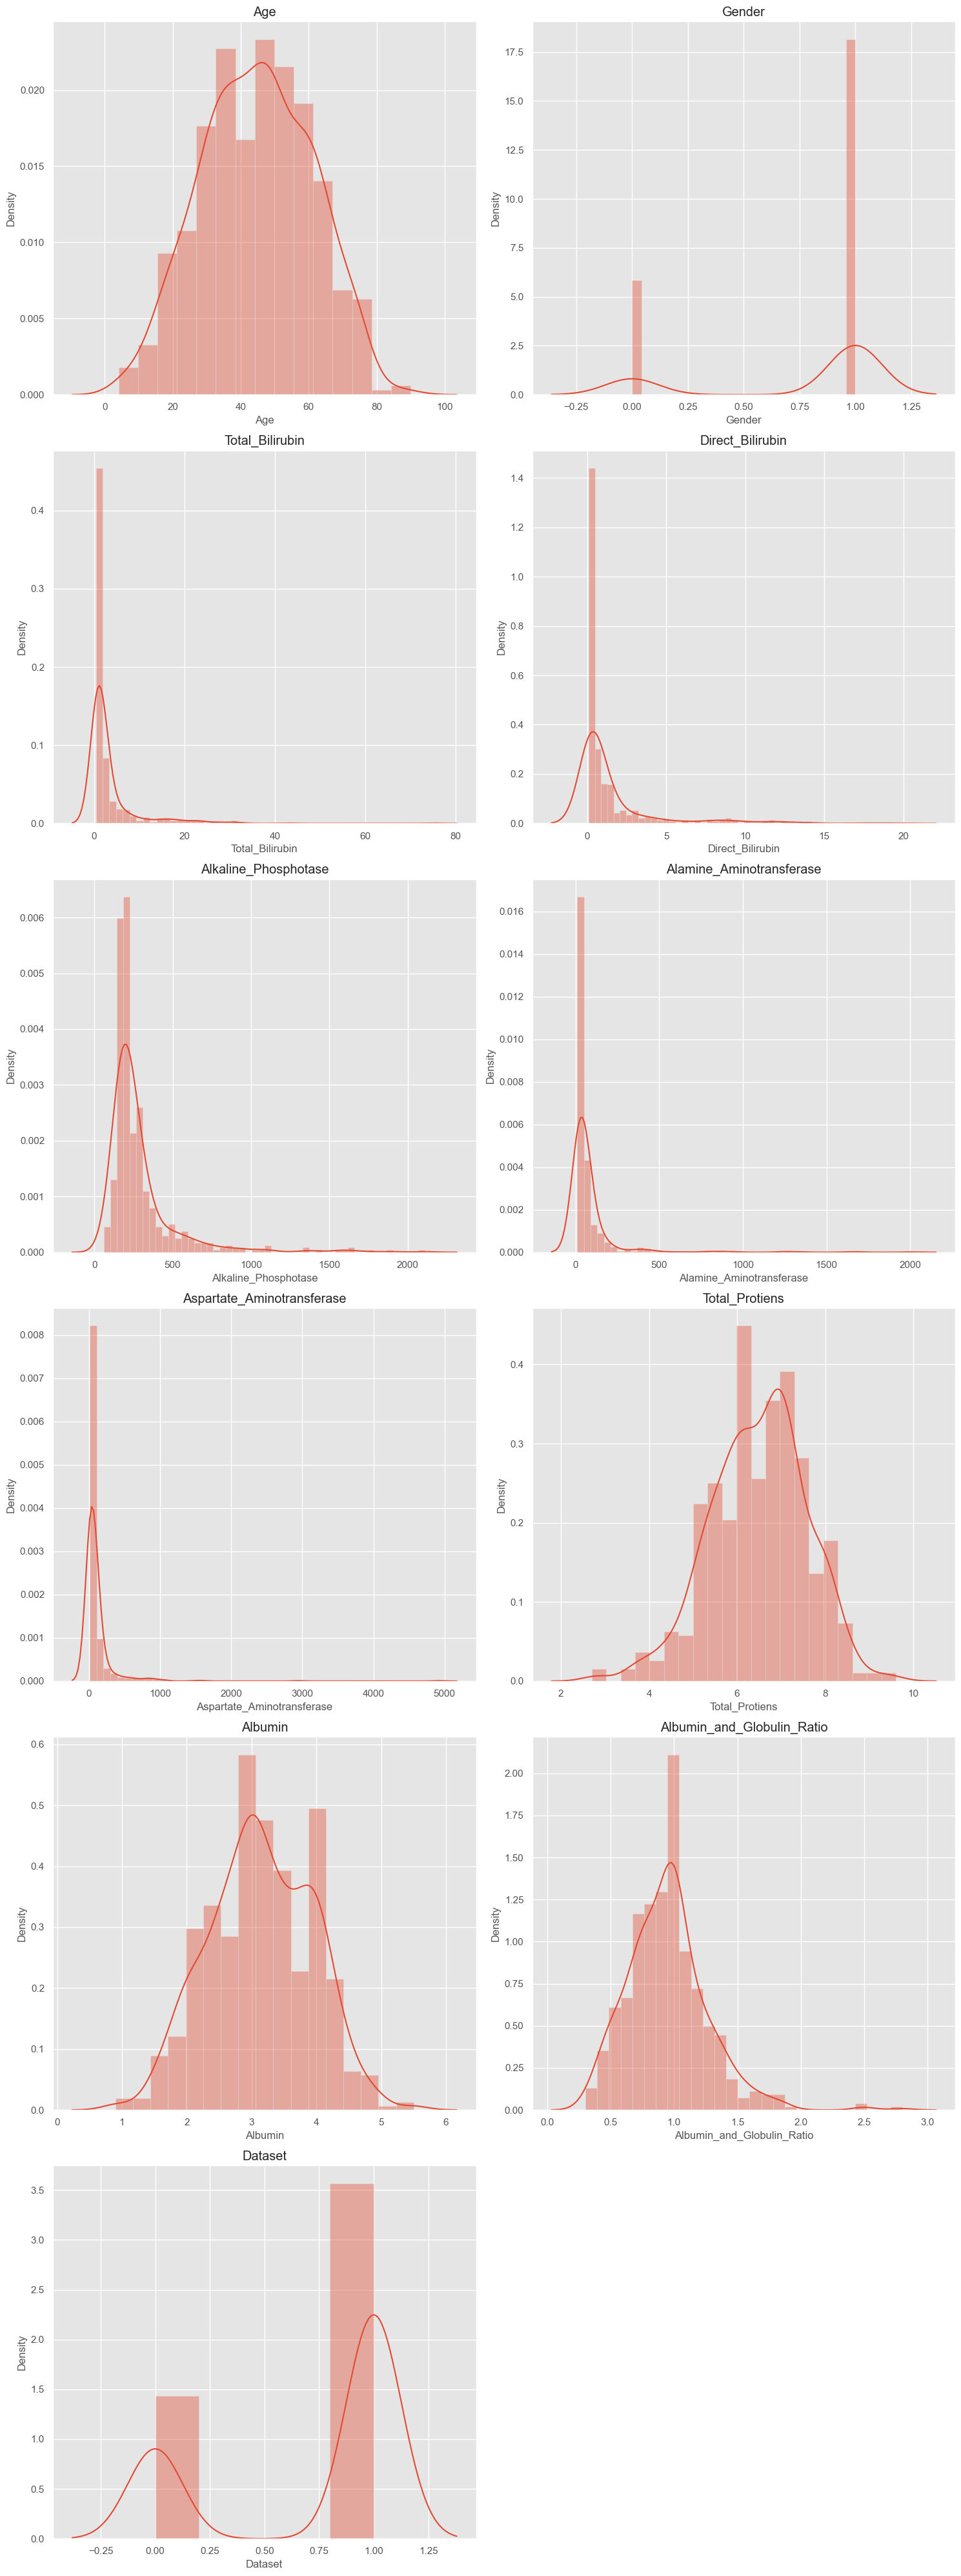

In [30]:
#  here we check the outlier present into the features.
dataset.columns

plt.figure(figsize=(15,40))
for i,val in enumerate(dataset.columns):
    plt.subplot(6, 2, i + 1)
    sns.distplot(dataset[val])
    plt.title(val)
    plt.tight_layout()

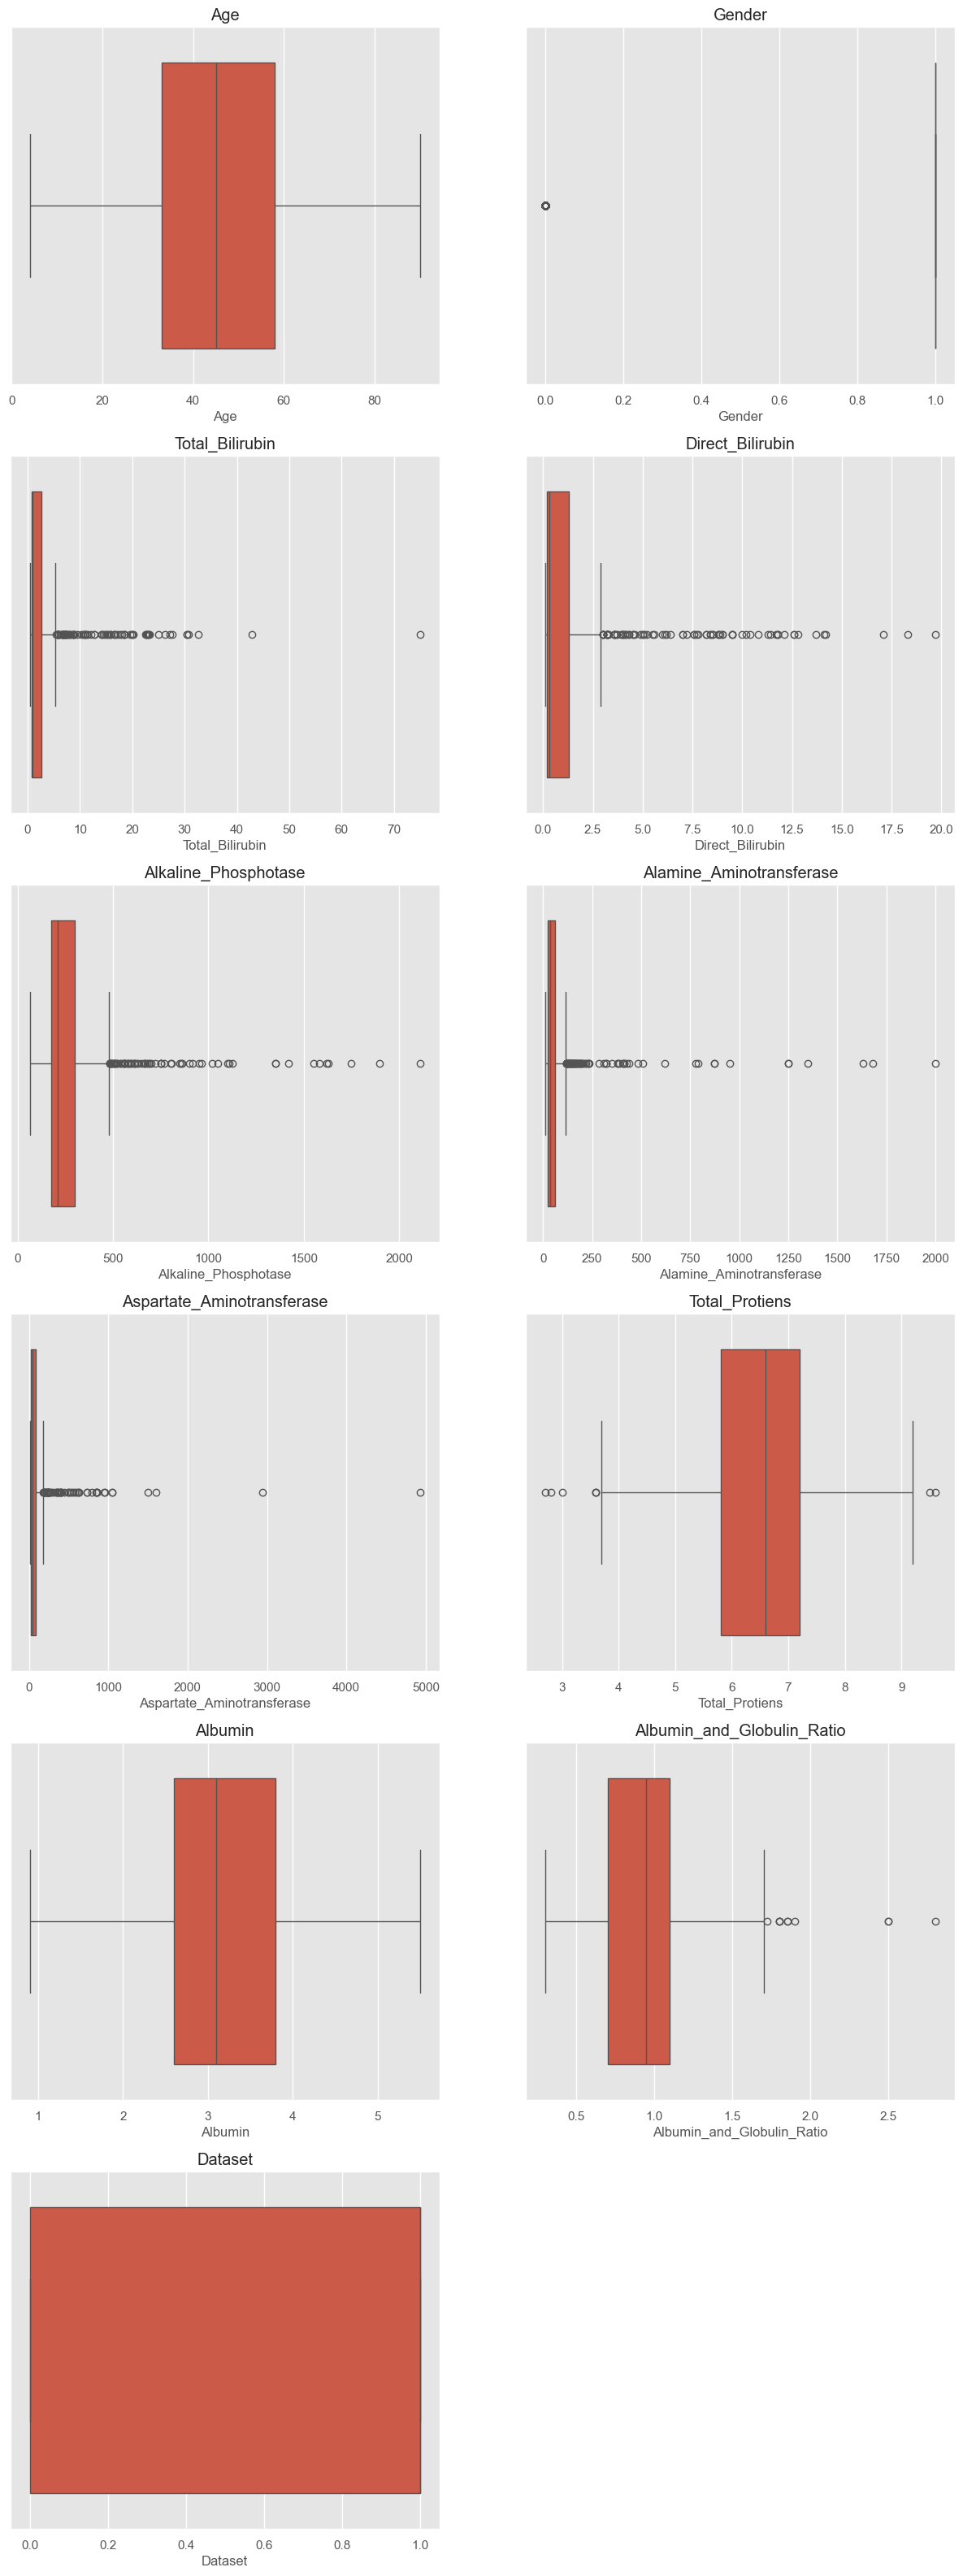

In [31]:
#  Checking the Outlier with the help of the Box Plot for each and every feature of dataset.
plt.figure(figsize=(15,40))
for i,val in enumerate(dataset.columns):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(dataset[val], orient='h')
    plt.title(val)

In [32]:
# check the outlier or we just remove it because we have the small data.


In [33]:
dataset.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [34]:
dataset = dataset[dataset.Aspartate_Aminotransferase < 2500]

In [35]:
dataset.Aspartate_Aminotransferase.sort_values(ascending=False).head()

118    1600
207    1500
199    1050
119    1050
47      960
Name: Aspartate_Aminotransferase, dtype: int64

In [36]:
dataset.shape

(581, 11)

dataset.isnull().sum()

# Machine Learning Model Implementation.

In [37]:
#  Now Here we need to split the data into the dependent and the independent Variable.

In [38]:
x = dataset.drop("Dataset", axis=1)
y = dataset["Dataset"]

In [39]:
# we need to divide the dataset into the training and testing dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [40]:
#  We need to scaling the training and the testing data.

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler  = StandardScaler()

In [43]:
x_train = scaler.fit_transform(x_train)

In [44]:
x_test = scaler.transform(x_test)

In [45]:
print(x.shape, x_train.shape, x_test.shape)

(581, 10) (464, 10) (117, 10)


## Logistic Regression Machine Learning Algorithms.

In [46]:
#  Different Model Training in the dataset.
model1 = LogisticRegression()

In [47]:
model1.fit(x_train, y_train)

LogisticRegression()

In [48]:
print(accuracy_score(y_test, model1.predict(x_test)))
print(accuracy_score(y_train, model1.predict(x_train)))
print(confusion_matrix(model1.predict(x_test), y_test))
print(classification_report(model1.predict(x_test), y_test))

0.6752136752136753
0.7306034482758621
[[ 8  6]
 [32 71]]
              precision    recall  f1-score   support

           0       0.20      0.57      0.30        14
           1       0.92      0.69      0.79       103

    accuracy                           0.68       117
   macro avg       0.56      0.63      0.54       117
weighted avg       0.84      0.68      0.73       117



## K Nearest Neighbour Algorithm.

In [49]:
model2 = KNeighborsClassifier(n_neighbors=5)

In [50]:
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
print(accuracy_score(y_test, model2.predict(x_test)))
print(accuracy_score(y_train, model2.predict(x_train)))
print(confusion_matrix(model2.predict(x_test), y_test))
print(classification_report(model2.predict(x_test), y_test))

0.6581196581196581
0.7844827586206896
[[15 15]
 [25 62]]
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        30
           1       0.81      0.71      0.76        87

    accuracy                           0.66       117
   macro avg       0.59      0.61      0.59       117
weighted avg       0.69      0.66      0.67       117



## Support Vector Classifier Machine Learning Algorithms.

In [59]:
# model3 = SVC(probability=True)

# parameters = {
#     'C': [0.1,0.4,0.9,1.1,1,5,9,20],
#     # 'kernel': ["rbf", "linear", "poly"],
#     'gamma': [0.001, 0.01, 0.1, 0.5,0.9,1.0,1.4],
#     # 'degree': range(2,30, 1),
# }

# grid_search = GridSearchCV(model3, parameters)
# grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 0.4, 0.9, 1.1, 1, 5, 9, 20],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 0.9, 1.0, 1.4]})

In [60]:
# grid_search.best_params_

{'C': 0.1, 'gamma': 0.001}

In [61]:
# grid_search.best_score_

0.726297335203366

In [63]:
# # model3 = SVC(C = 0.1, gamma=0.001, probability=True)
# model3.fit(x_train, y_train)

SVC(C=0.1, gamma=0.001, probability=True)

In [64]:
# print(accuracy_score(y_test, model3.predict(x_test)))
# print(accuracy_score(y_train, model3.predict(x_train)))
# print(confusion_matrix(model3.predict(x_test), y_test))
# print(classification_report(model3.predict(x_test), y_test))

0.6581196581196581
0.7262931034482759
[[ 0  0]
 [40 77]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.66      0.79       117

    accuracy                           0.66       117
   macro avg       0.50      0.33      0.40       117
weighted avg       1.00      0.66      0.79       117



## Decision Tree Classifier Machine Learning Algorithms.

In [52]:
model4 = DecisionTreeClassifier()

parameters = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': range(2,30,1),
    'splitter':['best', 'random'],
    'max_depth':range(1,30,1),
    'min_samples_split':range(1,30,1),
    'min_samples_leaf':range(1,30,1),
}

grid_search = GridSearchCV(model4, parameters)
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
print(accuracy_score(y_test, model4.predict(x_test)))
print(accuracy_score(y_train, model4.predict(x_train)))
print(confusion_matrix(model4.predict(x_test), y_test))
print(classification_report(model4.predict(x_test), y_test))

In [54]:
model_dataset = pd.DataFrame({
    "Model" : ["Logistic Regression", "K Nearest Neighbour"],
    "Accuracy" : [accuracy_score(y_test, model1.predict(x_test)) * 100, accuracy_score(y_test, model2.predict(x_test)) * 100]
})

model_dataset

,Model,Accuracy
0,Logistic Regression,67.521368
1,K Nearest Neighbour,65.811966


In [ ]:
#  Draw the AUC Curve and the ROC Curve.